Load Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

from scipy.stats import mannwhitneyu,kruskal

In [2]:
warnings.filterwarnings("ignore")

Load Dataset

In [5]:
clean_data = pd.read_csv('D:/Bootcamp/Tugas/Capstone_Project_2/Data/Cleaned_Data/NYC_TLC_Trip_Record_Clean.csv', sep=',')
data_frame = clean_data.copy()
data_frame.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,day_category,pickup_time,RatecodeID,PULocationID,PUBorough,PUZone,DOLocationID,DOBorough,...,fare_amount,fare_amount_bins,tip_amount,tip_amount_bins,payment_type,trip_type,trip_duration,duration_bins,speed,speed_bins
0,2023-01-01 00:26:10,2023-01-01 00:37:11,Weekend,Midnight,Standard rate,166,Manhattan,Morningside Heights,143,Manhattan,...,14.9,<20$,4.03,1-5$,Credit card,Street-hail,11.02,11-20 minutes,14.05,11-20 mph
1,2023-01-01 00:51:03,2023-01-01 00:57:49,Weekend,Midnight,Standard rate,24,Manhattan,Bloomingdale,43,Manhattan,...,10.7,<20$,2.64,1-5$,Credit card,Street-hail,6.77,<10 minutes,16.04,11-20 mph
2,2023-01-01 00:13:14,2023-01-01 00:19:03,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,238,Manhattan,...,6.5,<20$,1.70,1-5$,Credit card,Street-hail,5.82,<10 minutes,13.40,11-20 mph
3,2023-01-01 00:33:04,2023-01-01 00:39:02,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,74,Manhattan,...,6.0,<20$,0.00,0$,Credit card,Street-hail,5.97,<10 minutes,11.06,11-20 mph
4,2023-01-01 00:53:31,2023-01-01 01:11:04,Weekend,Midnight,Standard rate,41,Manhattan,Central Harlem,262,Manhattan,...,17.7,<20$,0.00,0$,Cash,Street-hail,17.55,11-20 minutes,9.50,<10 mph


Skimming Data

In [6]:
pd.DataFrame({
    'feature': data_frame.columns.values,
    'data_type': data_frame.dtypes.values,
    'null_value(%)': data_frame.isna().mean().values*100,
    'neg_value(%)': [len(data_frame[col][data_frame[col] < 0])/len(data_frame)*100 if col in data_frame.select_dtypes(include=[np.number]).columns else 0 for col in data_frame.columns],
    '0_value(%)': [len(data_frame[col][data_frame[col] == 0])/len(data_frame)*100 if col in data_frame.select_dtypes(include=[np.number]).columns else 0 for col in data_frame.columns],
    'duplicate' : data_frame.duplicated().sum(),
    'n_unique': data_frame.nunique().values,
    'sample_unique': [data_frame[col].unique() for col in data_frame.columns]}
).round(3)

,feature,data_type,null_value(%),neg_value(%),0_value(%),duplicate,n_unique,sample_unique
0,lpep_pickup_datetime,object,0.0,0.0,0.000,0,59508,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
1,lpep_dropoff_datetime,object,0.0,0.0,0.000,0,59493,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
2,day_category,object,0.0,0.0,0.000,0,2,"[Weekend, Weekdays]"
3,pickup_time,object,0.0,0.0,0.000,0,5,"[Midnight, Morning, Noon, Evening, Night]"
4,RatecodeID,object,0.0,0.0,0.000,0,4,"[Standard rate, Negotiated fare, JFK Airport, ..."
5,PULocationID,int64,0.0,0.0,0.000,0,192,"[166, 24, 41, 181, 255, 75, 66, 195, 83, 97, 7..."
6,PUBorough,object,0.0,0.0,0.000,0,5,"[Manhattan, Brooklyn, Queens, Bronx, Staten Is..."
7,PUZone,object,0.0,0.0,0.000,0,191,"[Morningside Heights, Bloomingdale, Central Ha..."
8,DOLocationID,int64,0.0,0.0,0.000,0,243,"[143, 43, 238, 74, 262, 45, 75, 166, 140, 234,..."
9,DOBorough,object,0.0,0.0,0.000,0,6,"[Manhattan, Brooklyn, Queens, Bronx, EWR, Stat..."


Data Analys Explanation

    Categorical

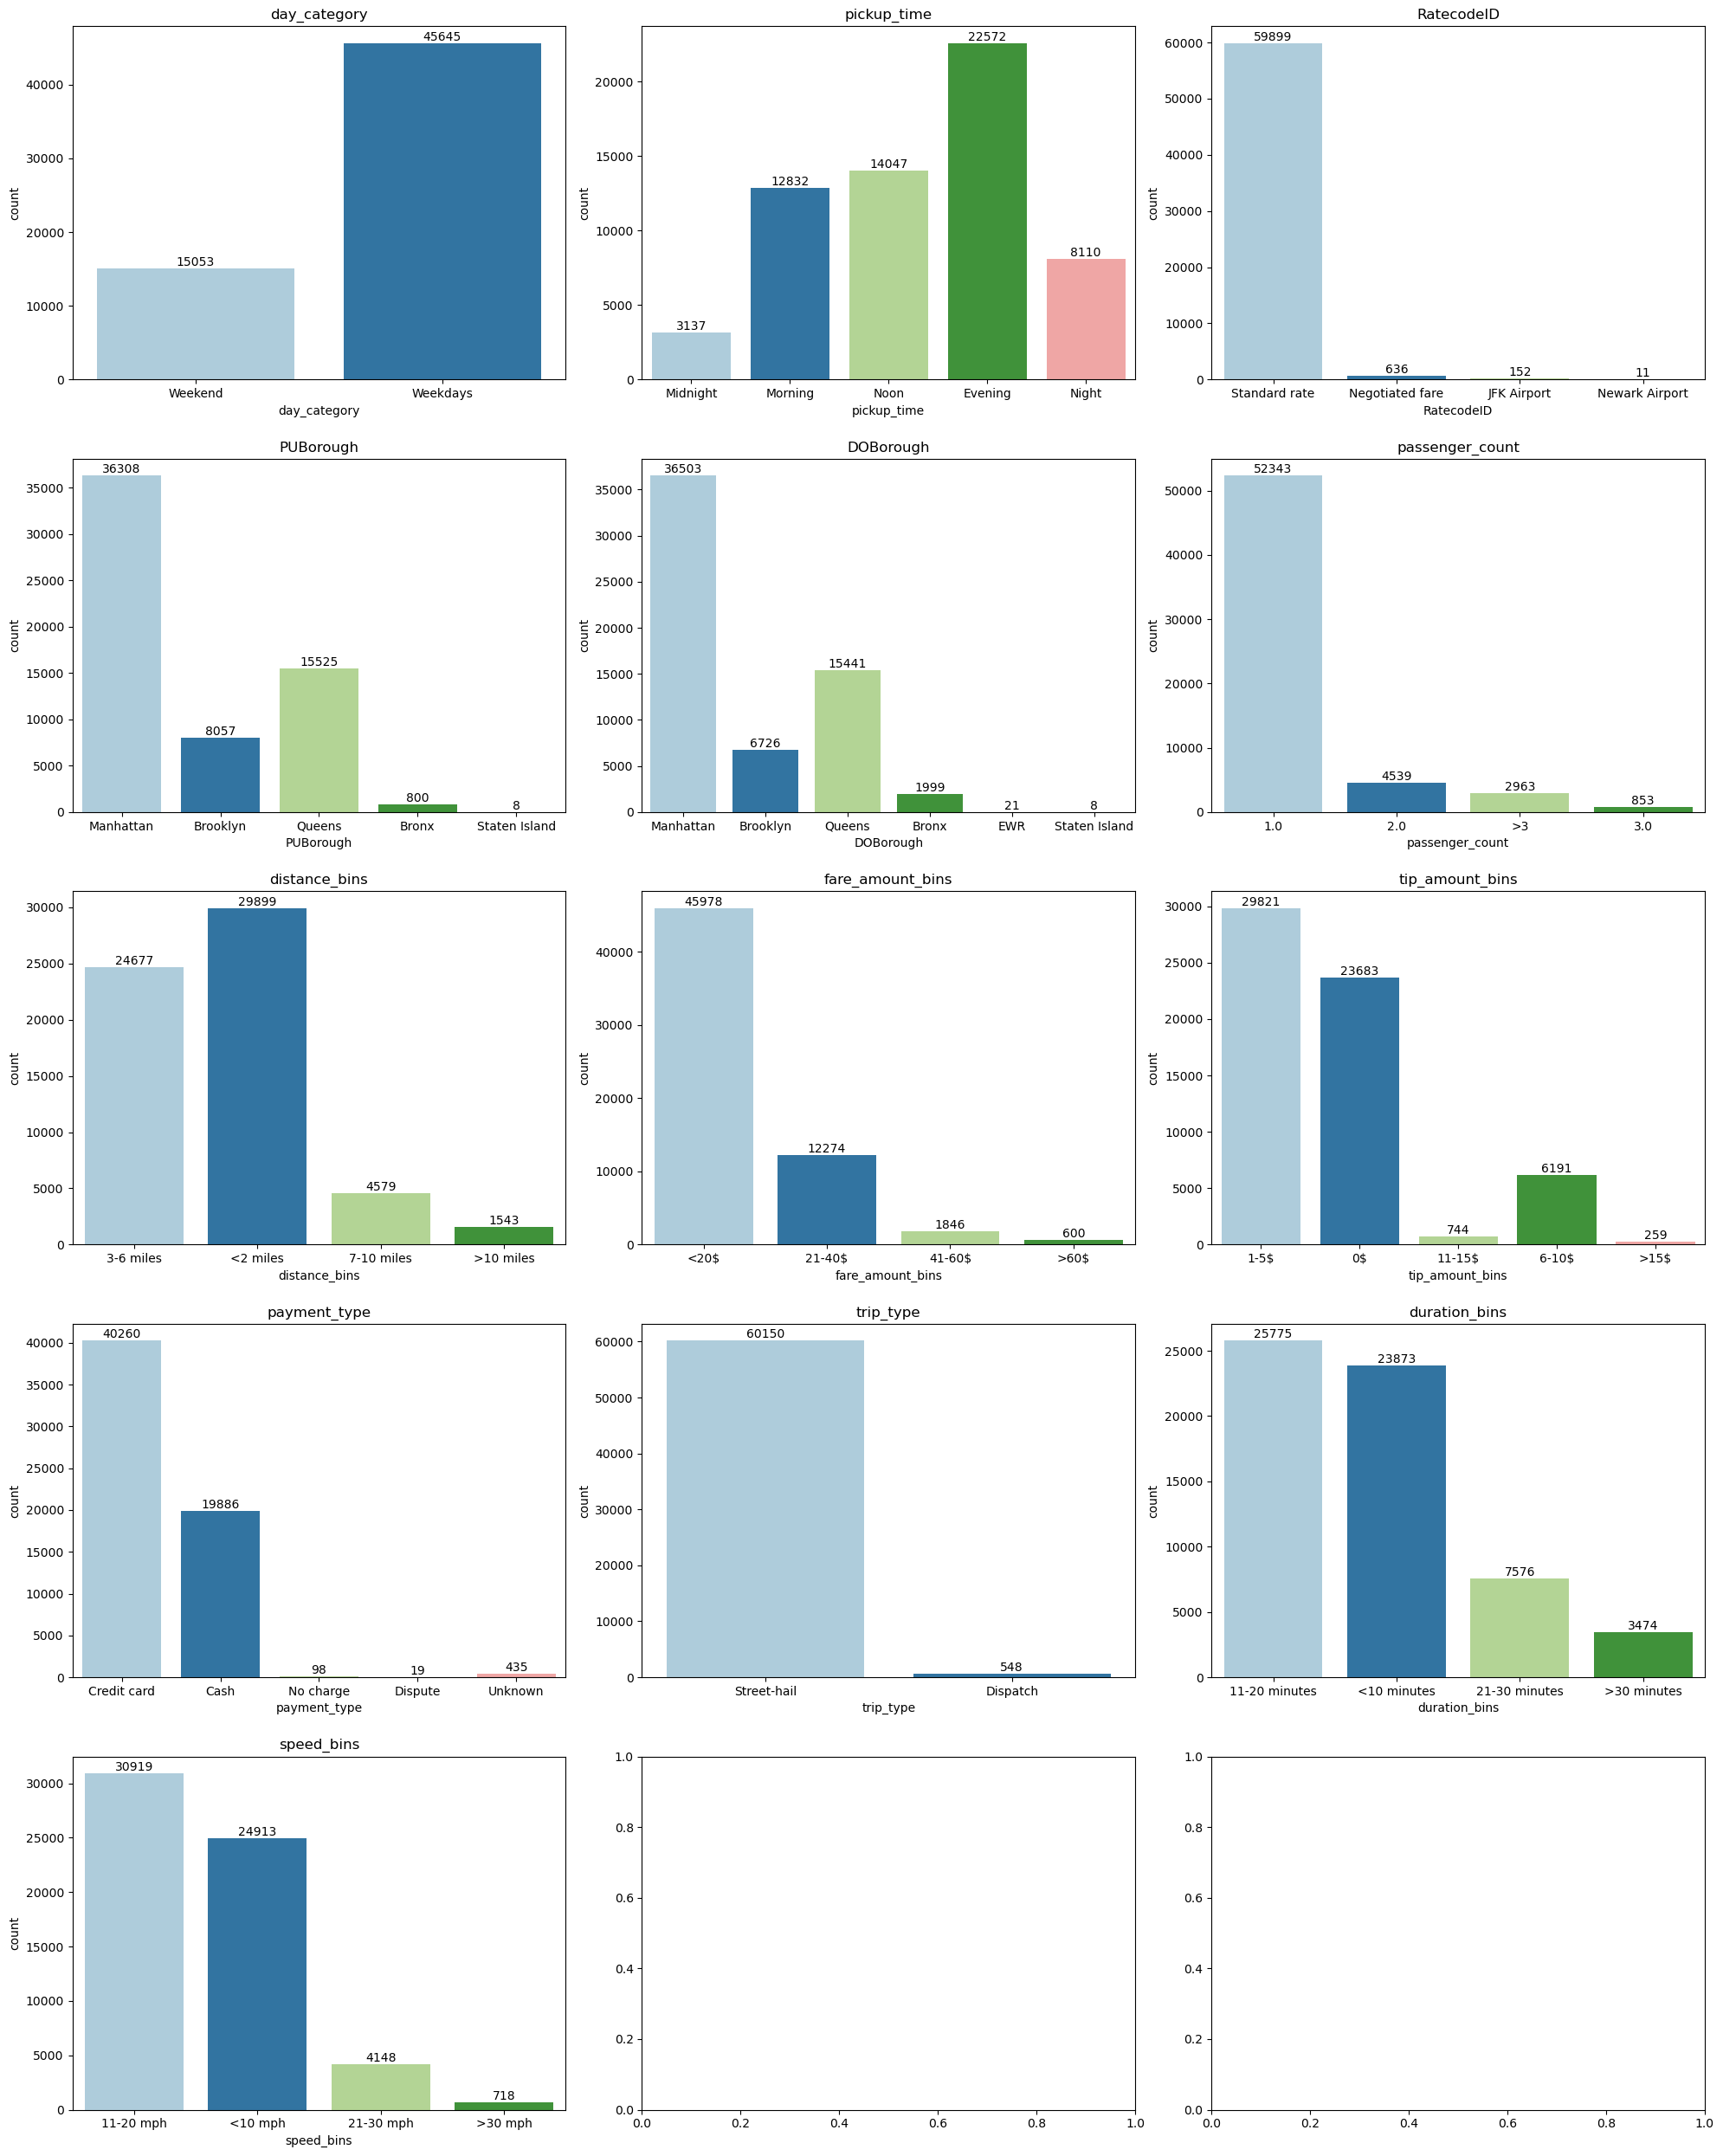

In [10]:
columns = ['day_category','pickup_time','RatecodeID','PUBorough','DOBorough','passenger_count','distance_bins','fare_amount_bins','tip_amount_bins','payment_type','trip_type','duration_bins','speed_bins']

fig,axis = plt.subplots(ncols=3,nrows=5,figsize=(20, 25))
axis = axis.flatten()

for i, column in enumerate(columns):
    bars = sns.countplot(data=data_frame, x=column, palette=sns.color_palette('Paired'), ax=axis[i])
    axis[i].set_title(column)
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axis[i].text(x_value,y_value,label,ha='center',va='bottom') 

plt.tight_layout(w_pad=0.5,h_pad=2)
plt.show()

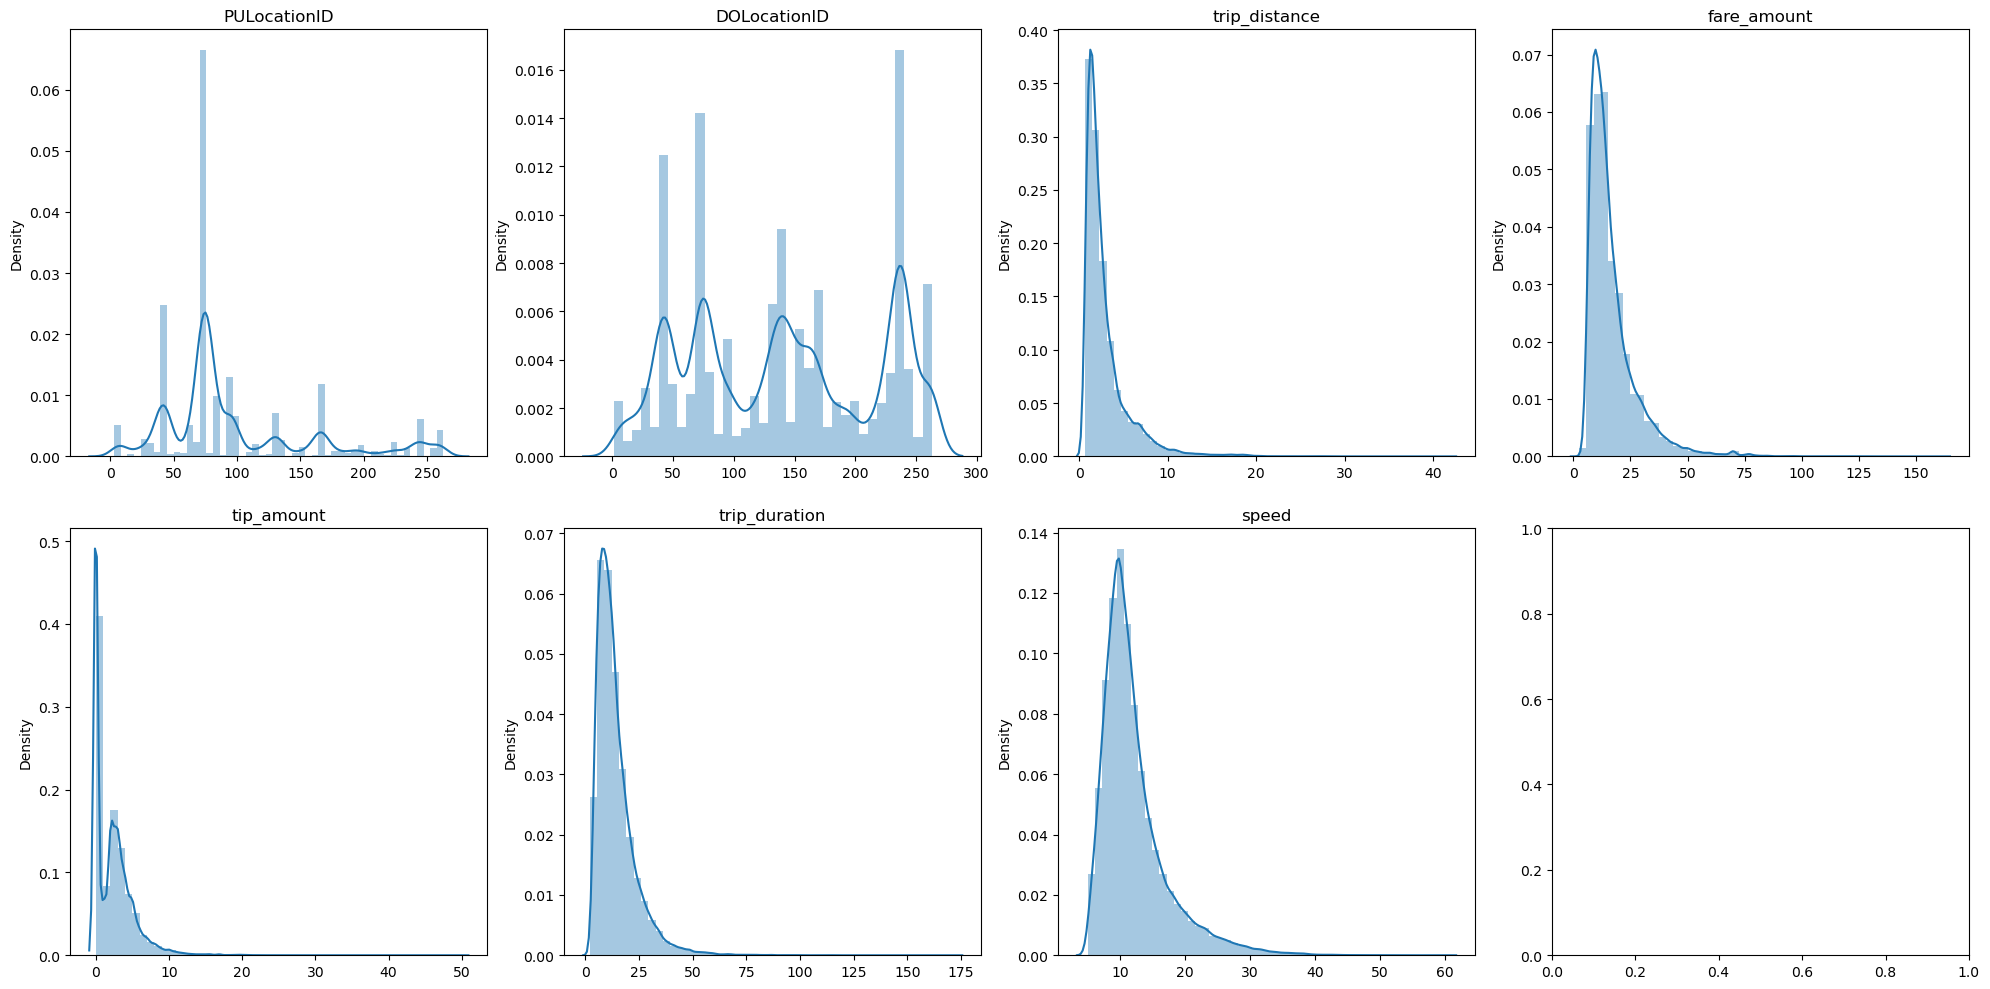

In [11]:
fig,axis = plt.subplots(ncols=4,nrows=2,figsize=(20,10))
index = 0
axis = axis.flatten()
for k, v in data_frame.select_dtypes(include=[np.number]).items():
    axis[index].set_title(k)
    sns.distplot(x=data_frame[k],ax=axis[index])
    index += 1
plt.tight_layout(w_pad=0.5,h_pad=2)
plt.show()

Data Analysis

In [12]:

data_frame['lpep_pickup_datetime'] = pd.to_datetime(data_frame['lpep_pickup_datetime'])
data_frame['lpep_dropoff_datetime'] = pd.to_datetime(data_frame['lpep_dropoff_datetime'])

    Demands Based in Time

In [13]:
trip_monthly = data_frame.groupby(data_frame['lpep_pickup_datetime'].dt.date).agg(trip_bydate=('lpep_pickup_datetime','count')).reset_index()
trip_monthly['lpep_pickup_datetime'] = pd.to_datetime(trip_monthly['lpep_pickup_datetime'])
trip_monthly['day_of_week'] = trip_monthly['lpep_pickup_datetime'].dt.day_name()

trip_daily = trip_monthly.groupby('day_of_week').agg(trip_byday=('trip_bydate', 'sum'), day_count=('day_of_week', 'count'), avg_trip=('trip_bydate', 'mean')).reset_index()
trip_daily['day_cat']= trip_daily['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekdays')

trip_daily_category = trip_daily.groupby('day_cat').agg(trip_bycat=('trip_byday', 'sum')).reset_index()

trip_merge = pd.merge(trip_monthly, trip_daily, on='day_of_week', how='left')
trip_merge = pd.merge(trip_merge, trip_daily_category, on='day_cat', how='left')

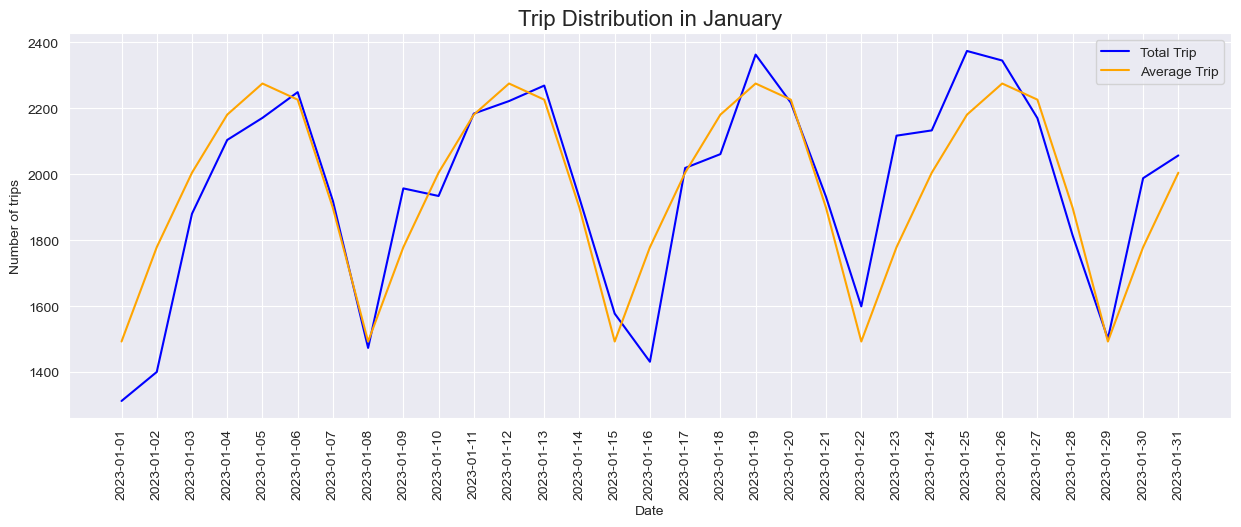

In [14]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='trip_bydate', 
             color='blue',
             label = 'Total Trip')

sns.lineplot(data=trip_merge,
             x='lpep_pickup_datetime', 
             y='avg_trip',
             color='orange',
             label = 'Average Trip')

plt.title('Trip Distribution in January',fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.xticks(trip_monthly['lpep_pickup_datetime'],rotation=90)

plt.show()

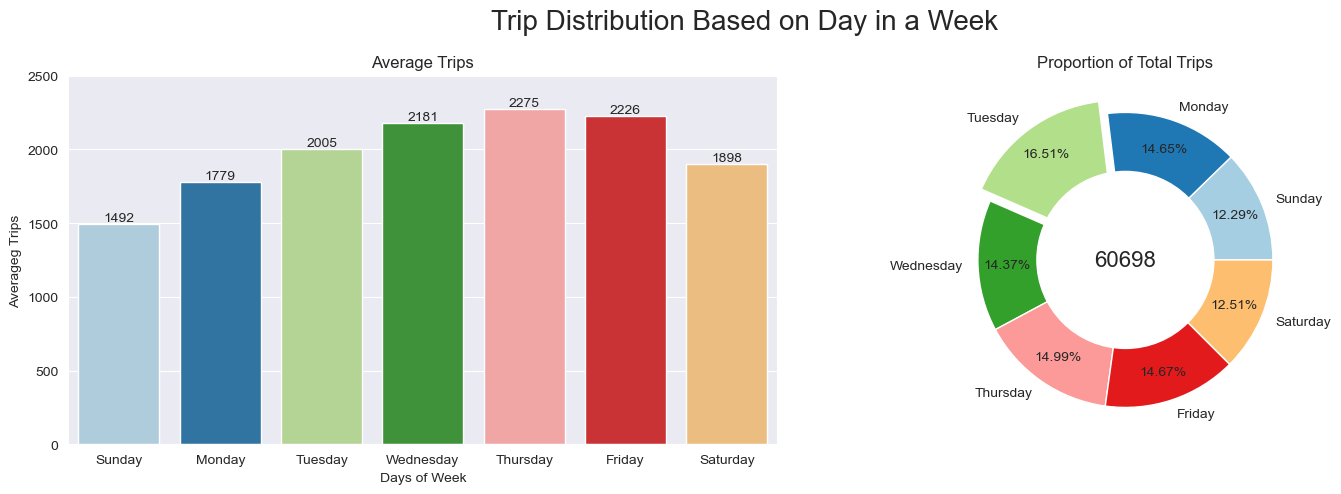

In [16]:
plt.figure(figsize=(15,5))

plt.suptitle('Trip Distribution Based on Day in a Week',fontsize=20)
plt.subplot(1,2,1)
bars = sns.barplot(x=trip_merge['day_of_week'].unique().tolist(), 
                   y=trip_merge['avg_trip'].unique().tolist(), 
                   palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+20
    label = "{:.0f}".format(trip_merge['avg_trip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.title('Average Trips')
plt.xlabel('Days of Week')
plt.ylabel('Averageg Trips')
plt.yticks(np.arange(0,2501,500))

plt.subplot(1,2,2)
plt.pie(x=trip_merge['trip_byday'].unique().tolist(), 
        labels=trip_merge['day_of_week'].unique().tolist(), 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0.1,0,0,0,0), 
        colors=sns.color_palette('Paired'))
fig = plt.gcf()
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig.gca().add_artist(centre_circle)
plt.text(0,0,trip_merge['trip_byday'].unique().sum(),ha='center',va='center',fontsize=16)
plt.title('Proportion of Total Trips')

plt.tight_layout()
plt.show()

In [17]:
trip_hourly = data_frame.groupby([data_frame['lpep_pickup_datetime'].dt.hour,'pickup_time']).agg(trip_byhour=('lpep_pickup_datetime','count')).reset_index()
trip_bytimecat = data_frame.groupby('pickup_time').agg(trip_bytime=('pickup_time','count')).reset_index()
trip_time_merge = pd.merge(trip_hourly,trip_bytimecat,on='pickup_time',how='left')

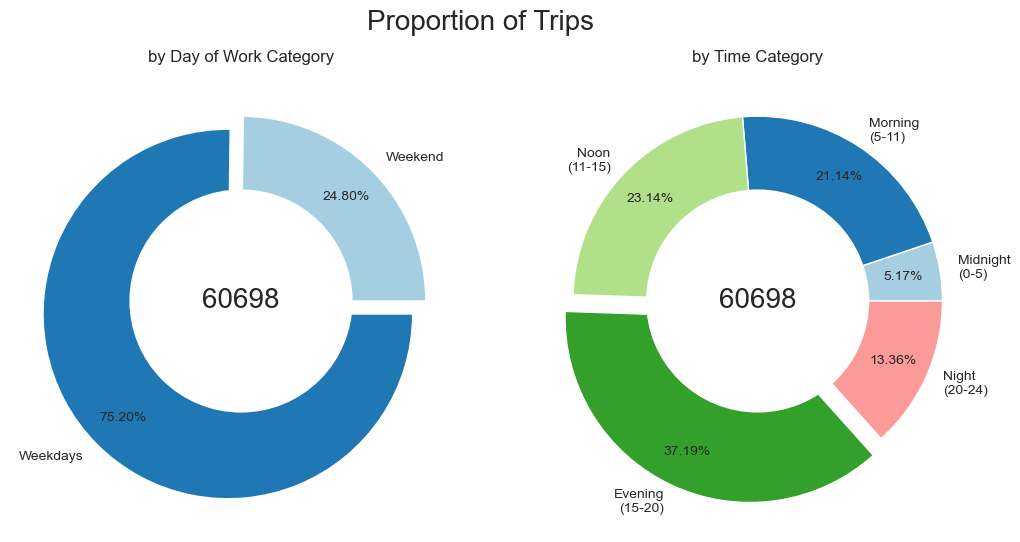

In [18]:
plt.figure(figsize=(15,6))
plt.suptitle('Proportion of Trips',fontsize=20)

plt.subplot(1,2,1)

plt.pie(x=trip_merge['trip_bycat'].unique().tolist(), 
        labels=trip_merge['day_cat'].unique().tolist(), 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0.1), 
        colors=sns.color_palette('Paired'))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0),0.6,fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0,0,trip_merge['trip_bydate'].sum(),ha='center',va='center',fontsize=20)
plt.title('by Day of Work Category')

plt.subplot(1,2,2)

labels = [f"{trip_time_merge['pickup_time'].unique().tolist()[0]}\n(0-5)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[1]}\n(5-11)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[2]}\n(11-15)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[3]}\n(15-20)",
          f"{trip_time_merge['pickup_time'].unique().tolist()[4]}\n(20-24)"]

plt.pie(x=trip_time_merge['trip_bytime'].unique().tolist(), 
        labels=labels, 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0,0,0,0.1,0), 
        colors=sns.color_palette('Paired'))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0),0.6,fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0,0,trip_time_merge['trip_byhour'].sum(),ha='center',va='center',fontsize=20)
plt.title('by Time Category')

plt.subplots_adjust(wspace=-0.2) 
plt.show()

In [25]:
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
cross = pd.crosstab(index=data_frame['lpep_pickup_datetime'].dt.day_name(),columns=data_frame['lpep_pickup_datetime'].dt.hour,margins=True).reindex(day_order)
cross.columns.name = None
cross.index.name = 'Day in a Week'

melted_cross = cross.iloc[:,:-1].reset_index().melt(id_vars='Day in a Week',var_name='Hours',value_name='Trips')
cross

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,All
Day in a Week,,,,,,,,,,,,,,,,,,,,,
Sunday,281,264,221,181,137,74,59,96,123,217,...,562,539,507,518,442,379,293,193,159,7462
Monday,110,67,49,62,52,51,134,375,418,482,...,695,704,704,724,552,378,305,218,151,8893
Tuesday,85,50,44,35,21,51,186,531,648,647,...,722,784,775,796,629,456,323,242,163,10023
Wednesday,84,66,27,25,17,43,165,406,510,518,...,651,689,747,733,601,408,279,211,152,8723
Thursday,88,61,41,25,31,51,163,424,505,544,...,658,699,760,793,543,444,309,240,165,9101
Friday,135,81,38,36,28,42,140,429,463,469,...,695,688,710,718,568,421,321,290,251,8905
Saturday,210,176,122,103,84,45,46,108,196,252,...,581,567,510,533,475,419,324,315,301,7591


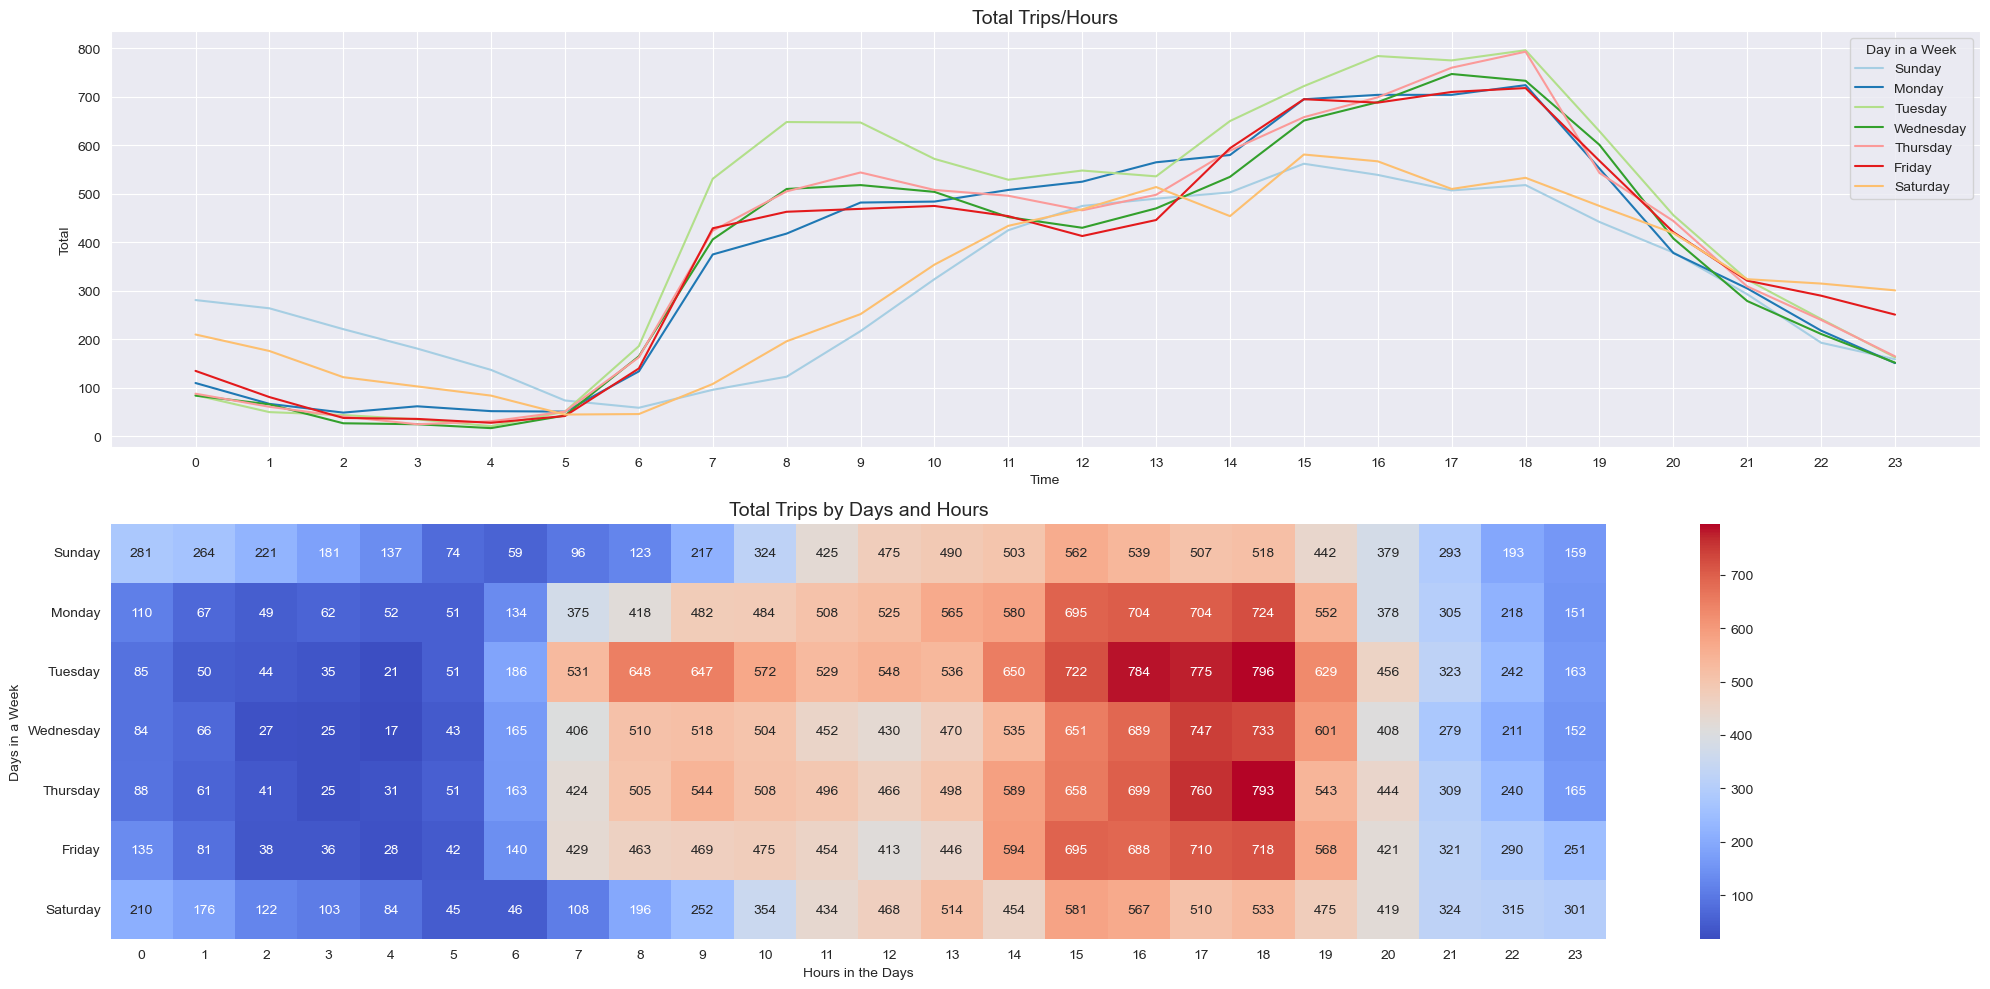

In [26]:
plt.figure(figsize=(20,10))

plt.subplot(2, 1, 1)
sns.lineplot(data=melted_cross, 
             x='Hours', 
             y='Trips', 
             hue='Day in a Week', 
             palette=sns.color_palette('Paired'))

plt.title('Total Trips/Hours', fontsize=14)
plt.xlabel('Time')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Total')

plt.subplot(2, 1, 2)
sns.heatmap(cross.iloc[:,:-1], cmap="coolwarm", annot=True, fmt='d')
plt.title('Total Trips by Days and Hours', fontsize=14)
plt.xlabel('Hours in the Days')
plt.ylabel('Days in a Week')

plt.tight_layout()
plt.show()

In [30]:
aggregate_borough = data_frame.groupby('PUBorough').agg(count=('PUBorough','count')).sort_values(by='count',ascending=False).reset_index()
aggregate_zone = data_frame.groupby('PUZone').agg(count=('PUZone','count')).sort_values(by='count',ascending=False).reset_index()

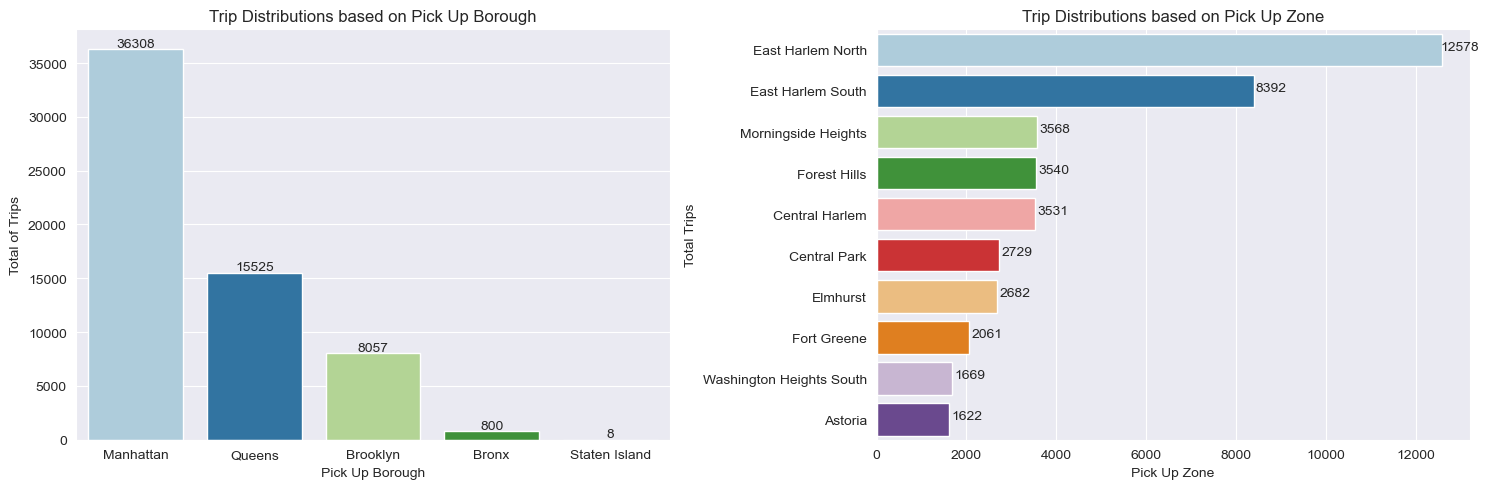

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
bars = sns.barplot(x=aggregate_borough['PUBorough'], 
                   y=aggregate_borough['count'], 
                   palette=sns.color_palette('Paired'))
for idx, bar in enumerate(bars.patches):
    # Get X and Y placement of label from bar
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+200
    label = "{:.0f}".format(aggregate_borough['count'].iloc[idx]) 
    plt.text(x_value,y_value,label,ha='center')

plt.title('Trip Distributions based on Pick Up Borough')
plt.xlabel('Pick Up Borough')
plt.ylabel('Total of Trips')

plt.subplot(1,2,2)
bars = sns.barplot(data=aggregate_zone.head(10),
                   y='PUZone', 
                   x='count', 
                   palette=sns.color_palette('Paired'))
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y()+bar.get_height()/2
    x_value = bar.get_width()+400
    label = "{:.0f}".format(aggregate_zone['count'].iloc[idx]) 
    plt.text(x_value,y_value,label,ha='center')

plt.title('Trip Distributions based on Pick Up Zone')
plt.xlabel('Pick Up Zone')
plt.ylabel('Total Trips')

plt.tight_layout()
plt.show()

In [32]:
aggregate_ratecode = data_frame.groupby('RatecodeID').agg(count=('RatecodeID','count')).sort_values(by='count',ascending=False).reset_index()
aggregate_ratecode['RatecodeID'] = aggregate_ratecode['RatecodeID'].apply(lambda x: x if x == 'Standard rate' else 'Other')
aggregate_ratecode = aggregate_ratecode.groupby('RatecodeID').agg(count=('count','sum')).sort_values(by='count',ascending=False).reset_index()

aggregate_payment = data_frame.groupby('payment_type').agg(count=('payment_type','count')).sort_values(by='count',ascending=False).reset_index()
aggregate_payment['payment_type'] = aggregate_payment['payment_type'].apply(lambda x: x if x == 'Credit card' or x == 'Cash' else 'Other')
aggregate_payment = aggregate_payment.groupby('payment_type').agg(count=('count','sum')).sort_values(by='count', ascending=False).reset_index()

aggregate_triptype = data_frame.groupby('trip_type').agg(count=('trip_type','count')).sort_values(by='count',ascending=False).reset_index()

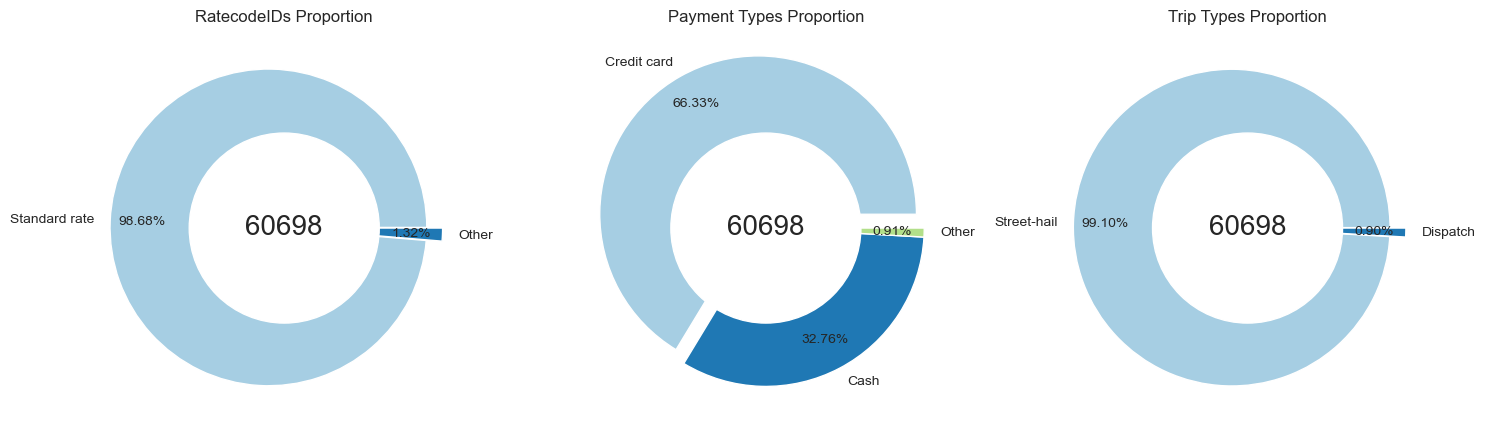

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.pie(x=aggregate_ratecode['count'], 
        labels=aggregate_ratecode['RatecodeID'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0), 
        colors=sns.color_palette('Paired'))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0),0.6,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('RatecodeIDs Proportion')
plt.text(0,0,len(data_frame),ha='center',va='center',fontsize=20)

plt.subplot(1,3,2)
plt.pie(x=aggregate_payment['count'], 
        labels=aggregate_payment['payment_type'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0), 
        colors=sns.color_palette('Paired'))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0),0.6,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Payment Types Proportion')
plt.text(0,0,len(data_frame),ha='center',va='center',fontsize=20)

plt.subplot(1,3,3)
plt.pie(x=aggregate_triptype['count'], 
        labels=aggregate_triptype['trip_type'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0), 
        colors=sns.color_palette('Paired'))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0),0.6,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Trip Types Proportion')
plt.text(0,0,len(data_frame),ha='center',va='center',fontsize=20)

plt.tight_layout() 
plt.show()

In [34]:
aggregate_distance = data_frame.groupby('distance_bins').agg(count=('distance_bins', 'count'), median=('trip_distance', 'median')).sort_values(by='count', ascending=False).reset_index()
aggregate_duration = data_frame.groupby('duration_bins').agg(count=('duration_bins', 'count'), median=('trip_duration', 'median')).sort_values(by='count', ascending=False).reset_index()

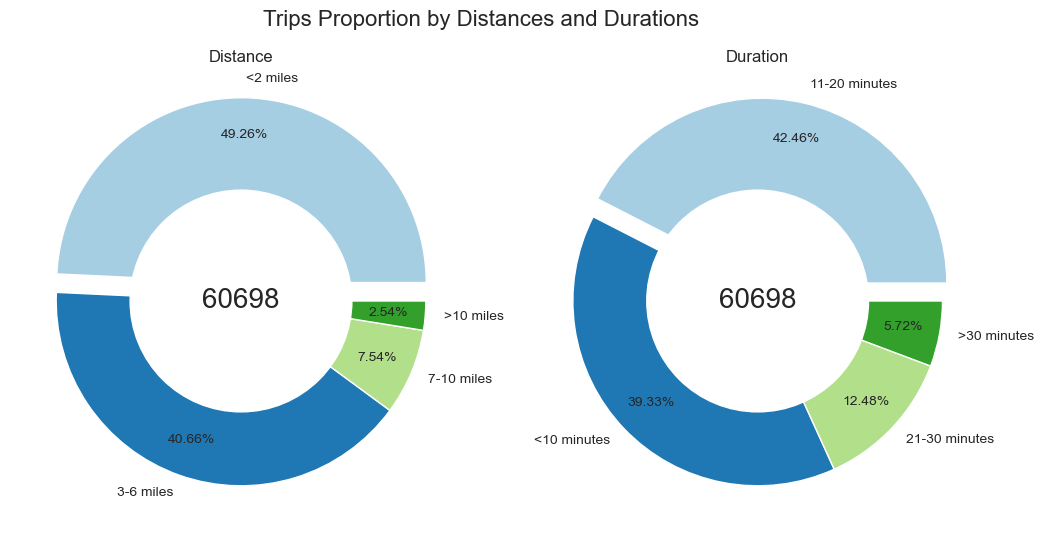

In [36]:
plt.figure(figsize=(15,6))
plt.suptitle('Trips Proportion by Distances and Durations',fontsize=16)
plt.subplot(1,2,1)

plt.pie(x=aggregate_distance['count'], 
        labels=aggregate_distance['distance_bins'], 
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0,0), 
        colors=sns.color_palette('Paired'))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Distance')
plt.text(0, 0, len(data_frame), ha='center', va='center', fontsize=20)

plt.subplot(1,2,2)
plt.pie(x=aggregate_duration['count'].unique().tolist(), 
        labels=aggregate_duration['duration_bins'],   
        pctdistance=0.8, 
        autopct='%1.2f%%', 
        explode=(0.1,0,0,0), 
        colors=sns.color_palette('Paired'))

fig = plt.gcf()
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Duration')
plt.text(0, 0, len(data_frame), ha='center', va='center', fontsize=20)

plt.subplots_adjust(wspace=-0.2) 
plt.show()

Amounts Distribution

In [60]:
puzone_amount = data_frame.groupby(['DOBorough', 'DOZone']).agg(trip_count=('fare_amount', 'count'), 
                                                            total_fare_amount=('fare_amount', 'sum'),
                                                            avg_fare_amount=('fare_amount', 'mean'),
                                                            median_fare_amount=('fare_amount', 'median')).sort_values(by='total_fare_amount', ascending=False).reset_index().round(2)

fig = px.treemap(puzone_amount, 
                 path=[px.Constant("All"),'DOBorough','DOZone'], 
                 values='total_fare_amount', 
                 color='median_fare_amount',
                 color_continuous_scale='RdBu_r',
                 range_color=[5,40],
                 custom_data=['trip_count','median_fare_amount'],
                 title='Heatmap for Average fare amount based on Drop off Location')
fig.update_traces(hovertemplate='<b>%{label}</b><br>Total Fare: %{value}<br>Trip Count: %{customdata[0]}<br>Median Fare: %{customdata[1]:.2f}')
fig.update_layout(margin= dict(t=50,l=0,r=0,b=0))
# fig.update_traces(marker= dict{'coloraxis'})
fig.show()

In [63]:
trip_amount_distances = data_frame.groupby(['PUZone', 'DOZone']).agg(trip_count=('PUZone', 'count'),
                                                                total_fare=('fare_amount', 'sum'), 
                                                                avg_fare=('fare_amount', 'mean'),
                                                                total_tip=('tip_amount', 'sum'), 
                                                                avg_tip=('tip_amount', 'mean')).reset_index().sort_values(by=['trip_count'], ascending=False).head(10).round(2)

route = trip_amount_distances['PUZone']+" - "+trip_amount_distances['DOZone']
trip_amount_distances.insert(0,'Route',route)
trip_amount_distances.drop(columns=['PUZone','DOZone'],inplace=True)

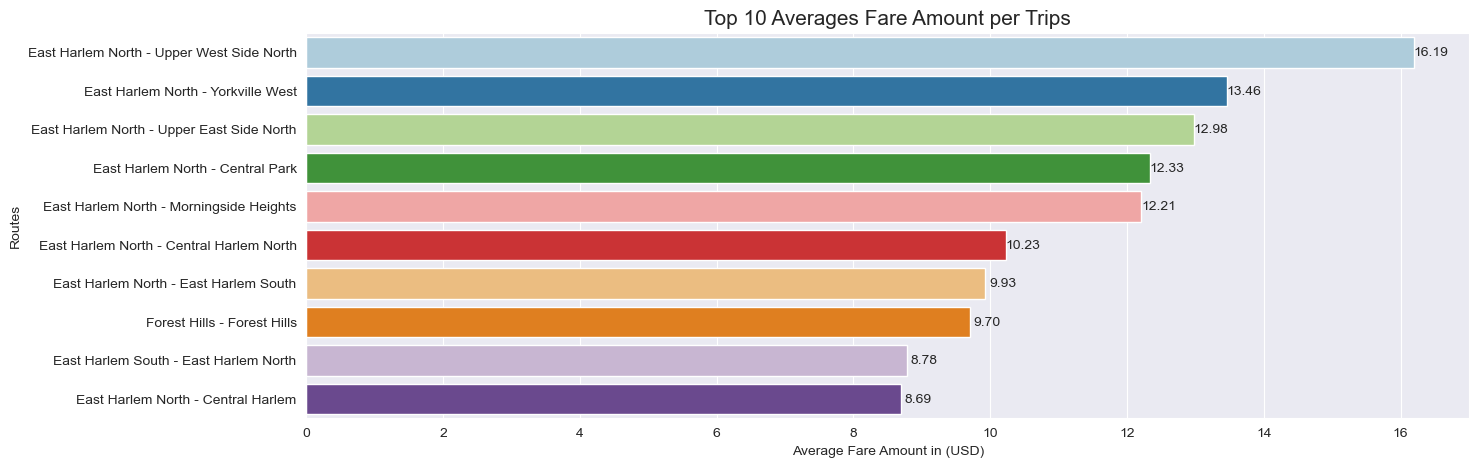

In [65]:
plt.figure(figsize=(15,5))
data = trip_amount_distances.sort_values(by='avg_fare',ascending=False)
bars = sns.barplot(data=data,
                   y='Route', 
                   x='avg_fare', 
                   palette=sns.color_palette('Paired'))
for idx, bar in enumerate(bars.patches):
    y_value = bar.get_y()+bar.get_height()/1.6
    x_value = bar.get_width()+0.25
    label = "{:.2f}".format(data['avg_fare'].iloc[idx]) 
    plt.text(x_value,y_value,label,ha='center')
plt.xlabel('Average Fare Amount in (USD)')
plt.ylabel('Routes')
plt.title('Top 10 Averages Fare Amount per Trips',fontsize=15)

plt.show()

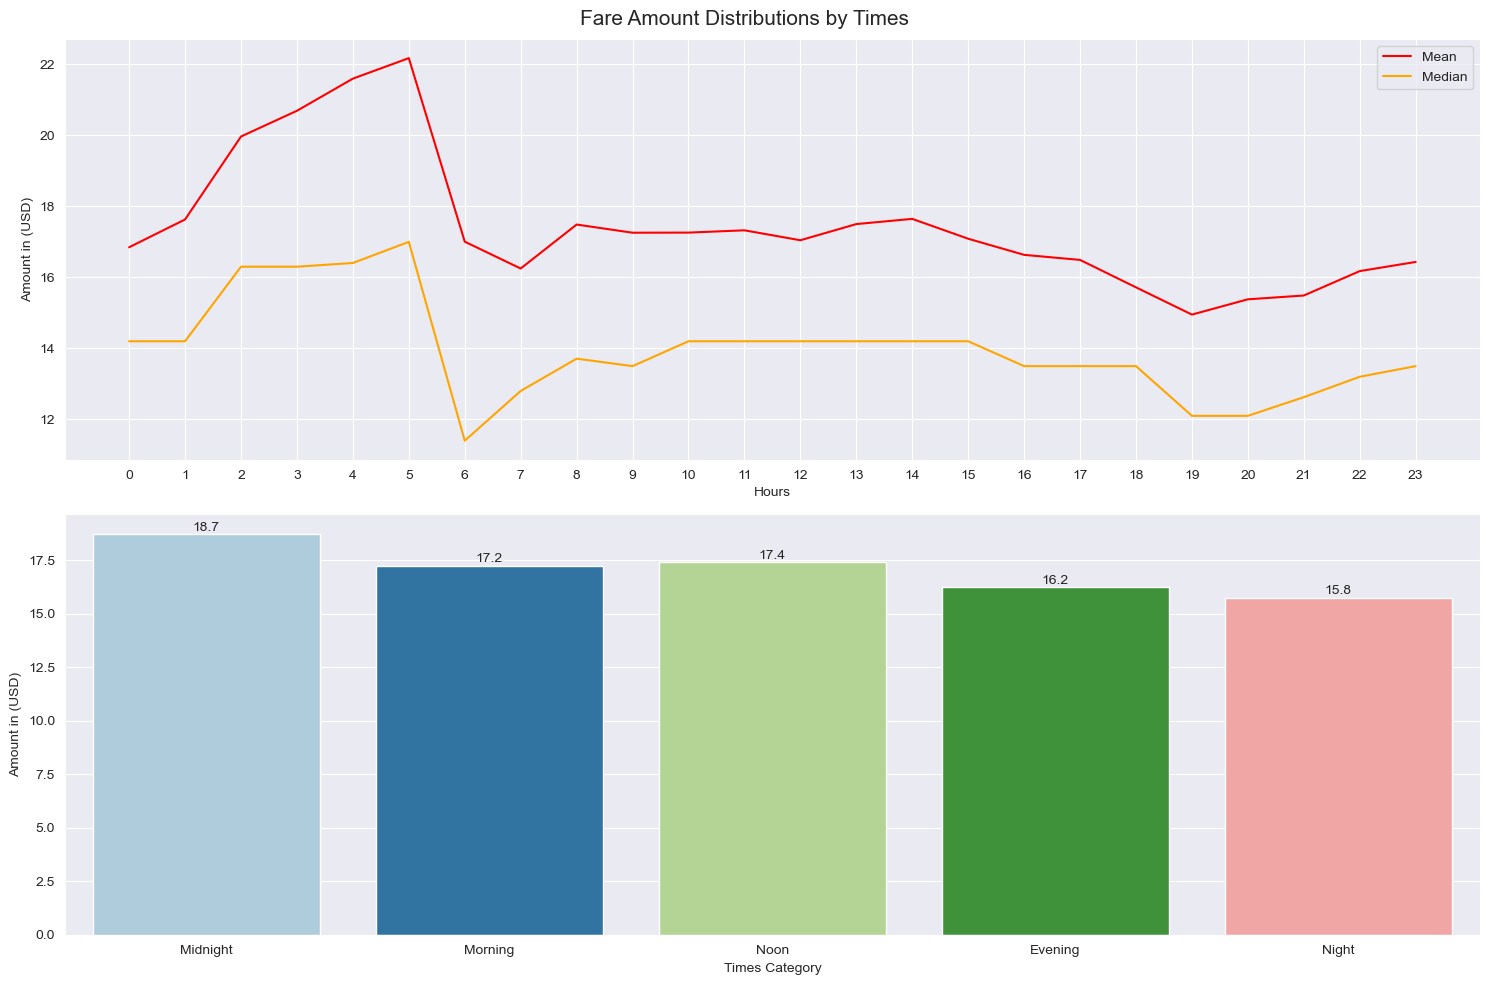

In [66]:
sort_time = ['Midnight','Morning','Noon','Evening','Night']
amount_by_hour = data_frame.groupby(data_frame['lpep_pickup_datetime'].dt.hour).agg(total_fare_amount=('fare_amount','sum'), 
                                                                                avg_fare_amount=('fare_amount','mean'), 
                                                                                median_fare_amount=('fare_amount','median')).reset_index()
amount_by_time = data_frame.groupby('pickup_time').agg(total_fare_amount=('fare_amount','sum'), 
                                                   avg_fare_amount=('fare_amount','mean'), 
                                                   median_fare_amount=('fare_amount','median')).reindex(sort_time).reset_index().round(2)

plt.figure(figsize=(15,10))
plt.suptitle('Fare Amount Distributions by Times',fontsize=15)

plt.subplot(2,1,1)
sns.lineplot(data=amount_by_hour, 
             x='lpep_pickup_datetime', 
             y='avg_fare_amount', 
             color='red',
             label = 'Mean')
sns.lineplot(data=amount_by_hour, 
             x='lpep_pickup_datetime', 
             y='median_fare_amount', 
             color='orange',
             label = 'Median')
plt.xlabel('Hours')
plt.xticks(np.arange(0,24,1))
plt.ylabel('Amount in (USD)')


plt.subplot(2,1,2)
bars = sns.barplot(data=amount_by_time,
                   x='pickup_time', 
                   y='avg_fare_amount',
                   palette=sns.color_palette('Paired'))

for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height() + 0.3
    label = "{:.1f}".format(amount_by_time['avg_fare_amount'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center',va='center')
plt.xlabel('Times Category')
plt.ylabel('Amount in (USD)')

plt.tight_layout()
plt.show()

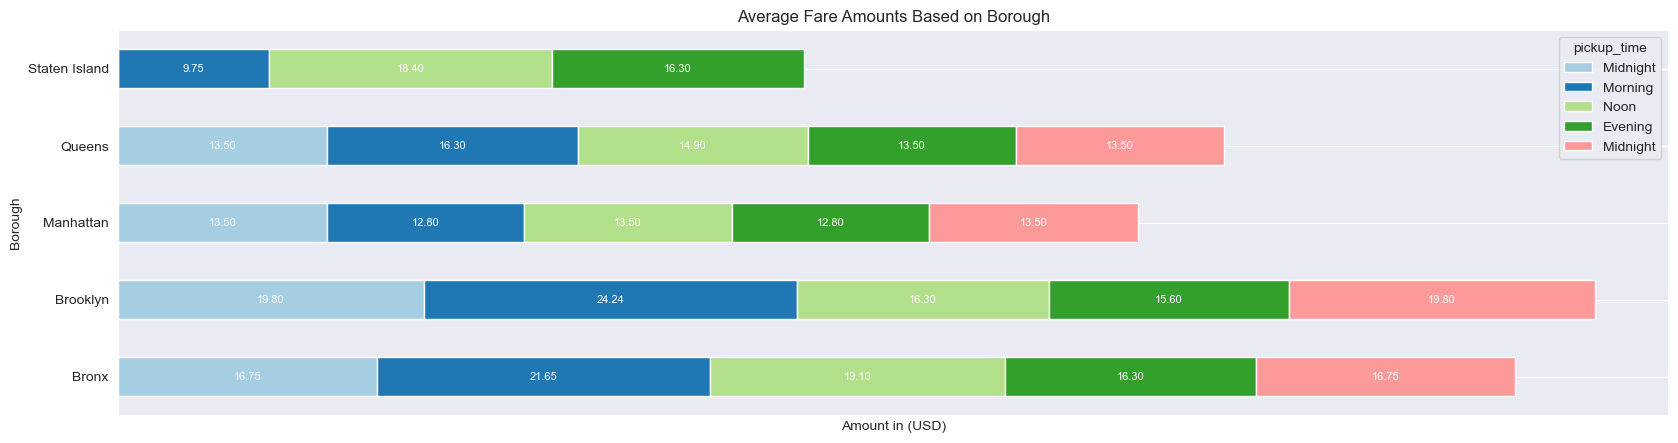

In [67]:
borough_amount_stack = data_frame.pivot_table(index='PUBorough',columns='pickup_time',values='fare_amount',aggfunc='median').fillna(0)
borough_amount_stack = borough_amount_stack[['Midnight','Morning','Noon','Evening','Midnight']]
borough_tip = data_frame.groupby(['PUBorough','pickup_time']).agg(median_tip=('tip_amount','median')).sort_values(by='median_tip',ascending=False).reset_index().round(2)

ax = borough_amount_stack.plot(kind='barh',stacked=True,color=sns.color_palette('Paired'),figsize=(20,5))
plt.title('Average Fare Amounts Based on Borough')
plt.xlabel('Amount in (USD)')
plt.ylabel('Borough')
plt.xticks([])
for index, rect in enumerate(ax.patches):
    width = rect.get_width()
    if width > 0:
        y = rect.get_y()+rect.get_height()/2
        cum_width_prev_segments = sum(borough_amount_stack.iloc[index % len(borough_amount_stack),:index // len(borough_amount_stack)])
        x = cum_width_prev_segments+width/2
        plt.text(x,y,f"{width:.2f}",ha='center',va='center',color='white',fontsize=8)

plt.show()

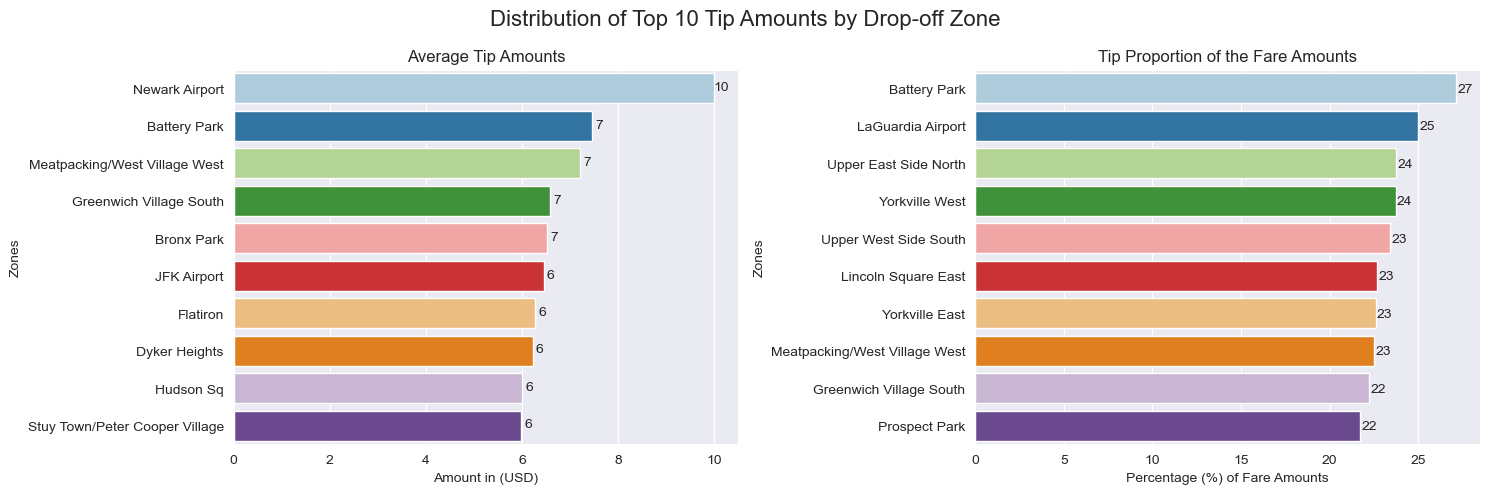

In [68]:
drop_location_tip = data_frame.groupby('DOZone').agg(count=('tip_amount','count'), 
                                        total_tip=('tip_amount','sum'), 
                                        median_tip=('tip_amount','median'), 
                                        median_fare=('fare_amount','median')).reset_index()
drop_location_tip['proportion_of_tip'] = (drop_location_tip['median_tip']/drop_location_tip['median_fare']*100).round(2)

plt.figure(figsize=(15,5))
plt.suptitle('Distribution of Top 10 Tip Amounts by Drop-off Zone',fontsize=16)

plt.subplot(1,2,1)
data = drop_location_tip[drop_location_tip['count']>1].sort_values(by='median_tip',ascending=False).head(10).reset_index()
bars = sns.barplot(data=data,
            x='median_tip',
            y='DOZone', 
            palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    y_value = bar.get_y()+bar.get_height()/2+0.05
    x_value = bar.get_width()+0.15
    label = "{:.0f}".format(data['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.title('Average Tip Amounts')
plt.xlabel('Amount in (USD)')
plt.ylabel('Zones')

plt.subplot(1,2,2)
data = drop_location_tip[drop_location_tip['count']>1].sort_values(by='proportion_of_tip',ascending=False).head(10).reset_index()
bars = sns.barplot(data=data,
            x='proportion_of_tip',
            y='DOZone', 
            palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    y_value = bar.get_y()+bar.get_height()/1.6
    x_value = bar.get_width()+0.5
    label = "{:.0f}".format(data['proportion_of_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.title('Tip Proportion of the Fare Amounts')
plt.xlabel('Percentage (%) of Fare Amounts')
plt.ylabel('Zones')

plt.tight_layout()
plt.show()

Tip Amount Correlation

In [69]:
data_frame_tip_correlation = data_frame[['PULocationID','DOLocationID','trip_distance', 'trip_duration','speed','fare_amount','tip_amount']][data_frame['tip_amount']>0]
data_frame_tip_correlation.head()

,PULocationID,DOLocationID,trip_distance,trip_duration,speed,fare_amount,tip_amount
0,166,143,2.58,11.02,14.05,14.9,4.03
1,24,43,1.81,6.77,16.04,10.7,2.64
2,41,238,1.30,5.82,13.40,6.5,1.70
5,181,45,3.80,17.42,13.09,19.1,4.85
7,41,166,1.11,4.95,13.45,7.2,1.00


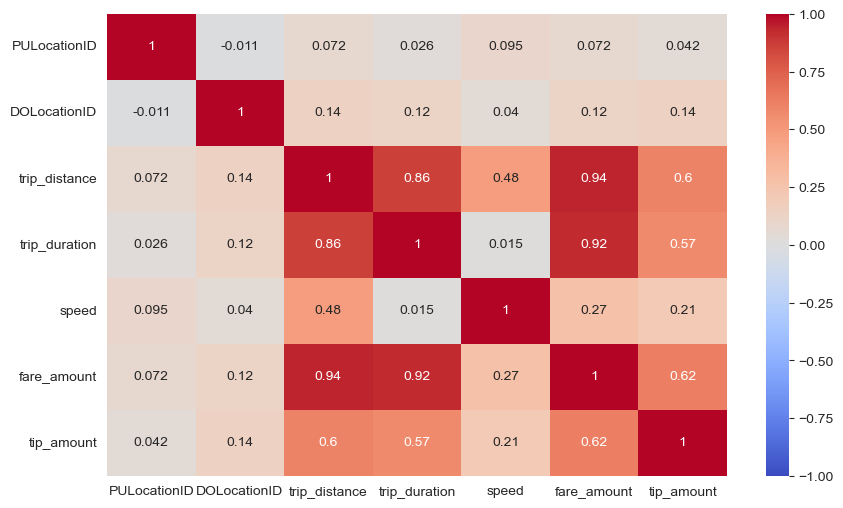

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(data_frame_tip_correlation.corr('spearman'),vmin=-1,vmax=1,annot=True,cmap='coolwarm')
plt.show()

Tip Amount Signification to Other Features

    Weekdays or Weekend

In [80]:
day_category_tip_correlation = data_frame[data_frame['tip_amount']>0][['day_category', 'tip_amount']]
median_tip_day_category = day_category_tip_correlation.groupby('day_category').agg(count=('tip_amount','count'),avg_tip=('tip_amount','mean'),median_tip=('tip_amount','median')).round(2).reset_index()
median_tip_day_category

,day_category,count,avg_tip,median_tip
0,Weekdays,27796,3.69,3.05
1,Weekend,9219,3.76,3.10


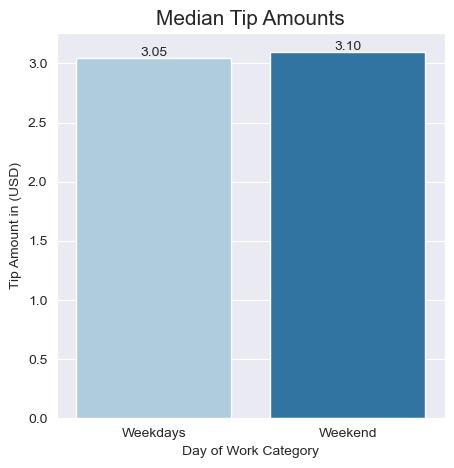

In [81]:
plt.figure(figsize=(5,5))

bars = sns.barplot(data=median_tip_day_category,x='day_category',y='median_tip',ci=0,palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.01
    label = "{:.2f}".format(median_tip_day_category['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.xlabel('Day of Work Category')
plt.ylabel('Tip Amount in (USD)')
plt.title('Median Tip Amounts',fontsize=15)
plt.show()

In [82]:
stat, pvalue= mannwhitneyu(
    day_category_tip_correlation[day_category_tip_correlation['day_category'] == 'Weekend']['tip_amount'].sample(100,random_state=0),
    day_category_tip_correlation[day_category_tip_correlation['day_category'] == 'Weekdays']['tip_amount'].sample(100,random_state=0),
    alternative='two-sided'
)

print('p-Value',pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.2989890032998106
Terima H0


    Pickup Time

In [83]:
pickup_time_tip_correlation = data_frame[data_frame['tip_amount']>0][['pickup_time','tip_amount']]
median_tip_pickup_time = pickup_time_tip_correlation.groupby('pickup_time').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
median_tip_pickup_time

,pickup_time,count,avg_tip,median_tip
0,Evening,14100,3.69,3.20
1,Midnight,1689,4.09,3.24
2,Morning,8044,3.63,2.88
3,Night,5135,3.56,3.00
4,Noon,8047,3.81,3.14


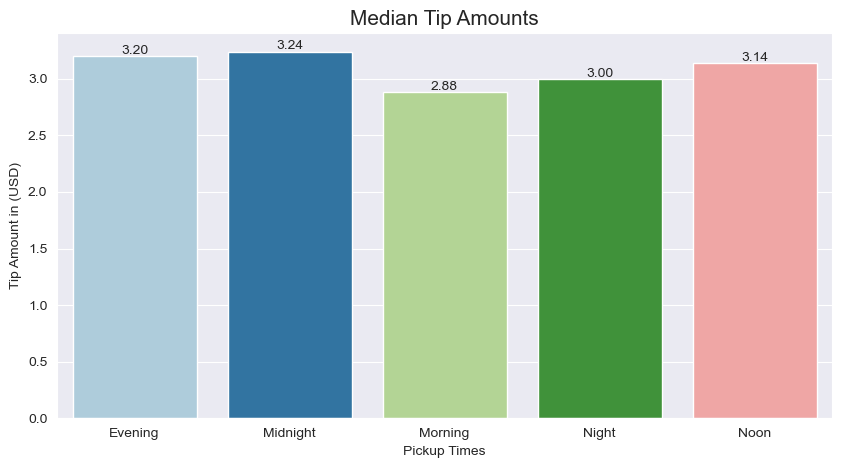

In [84]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=median_tip_pickup_time,x='pickup_time',y='median_tip',ci=0,palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.02
    label = "{:.2f}".format(median_tip_pickup_time['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')
    
plt.xlabel('Pickup Times')
plt.ylabel('Tip Amount in (USD)')
plt.title('Median Tip Amounts',fontsize=15)
plt.show()

In [85]:
stat, pvalue= kruskal(
    pickup_time_tip_correlation[pickup_time_tip_correlation['pickup_time'] == 'Midnight']['tip_amount'].sample(100,random_state=0),
    pickup_time_tip_correlation[pickup_time_tip_correlation['pickup_time'] == 'Morning']['tip_amount'].sample(100,random_state=0),
    pickup_time_tip_correlation[pickup_time_tip_correlation['pickup_time'] == 'Noon']['tip_amount'].sample(100,random_state=0),
    pickup_time_tip_correlation[pickup_time_tip_correlation['pickup_time'] == 'Evening']['tip_amount'].sample(100,random_state=0),
    pickup_time_tip_correlation[pickup_time_tip_correlation['pickup_time'] == 'Night']['tip_amount'].sample(100,random_state=0),
)

print('p-Value',pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.41009687386731164
Terima H0


    Trip Types

In [86]:
trip_type_tip_correlation = data_frame[data_frame['tip_amount']>0][['trip_type','tip_amount']]
median_tip_trip_type= trip_type_tip_correlation.groupby('trip_type').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
median_tip_trip_type

,trip_type,count,avg_tip,median_tip
0,Dispatch,237,6.95,5.00
1,Street-hail,36778,3.68,3.05


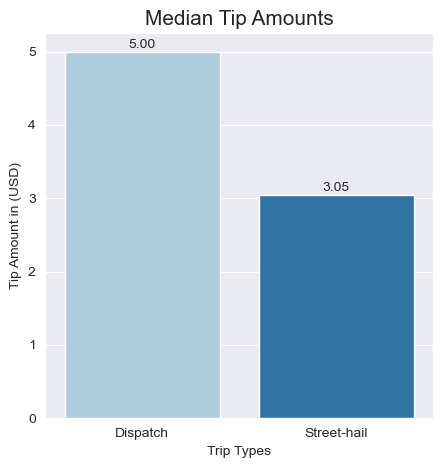

In [87]:
plt.figure(figsize=(5,5))

bars = sns.barplot(data=median_tip_trip_type,x='trip_type',y='median_tip',ci=0, palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.05
    label = "{:.2f}".format(median_tip_trip_type['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.xlabel('Trip Types')
plt.ylabel('Tip Amount in (USD)')
plt.title('Median Tip Amounts', fontsize=15)

plt.show()

In [88]:
stat, pvalue= mannwhitneyu(
    trip_type_tip_correlation[trip_type_tip_correlation['trip_type'] == 'Street-hail']['tip_amount'].sample(100,random_state=0),
    trip_type_tip_correlation[trip_type_tip_correlation['trip_type'] == 'Dispatch']['tip_amount'].sample(100,random_state=0),
    alternative='less'
)

print('p-Value',pvalue/2)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 3.7971370699720352e-06
Tolak H0


    Rate Code ID

In [89]:
rate_code_tip_correlation = data_frame[data_frame['tip_amount']>0][['RatecodeID','tip_amount']]
median_tip_rate_code = rate_code_tip_correlation.groupby('RatecodeID').agg(count=('tip_amount','count'),avg_tip=('tip_amount','mean'),median_tip=('tip_amount','median')).round(2).reset_index()
median_tip_rate_code

,RatecodeID,count,avg_tip,median_tip
0,JFK Airport,124,15.18,15.61
1,Negotiated fare,279,6.47,4.80
2,Newark Airport,7,20.09,21.99
3,Standard rate,36605,3.64,3.05


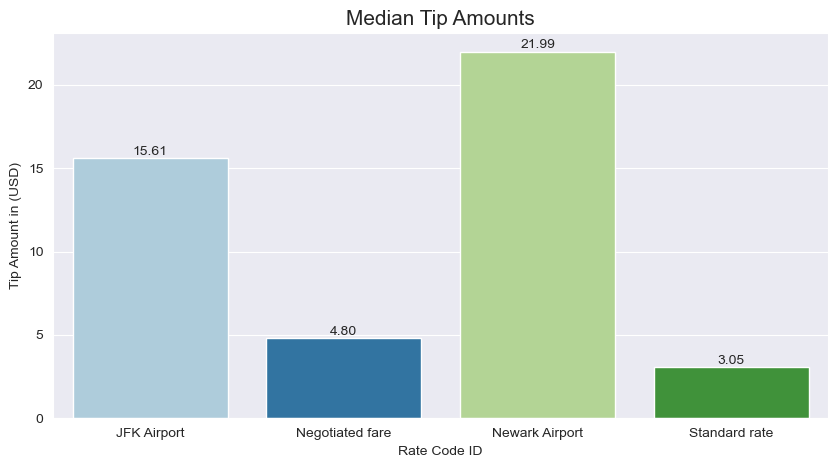

In [91]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=median_tip_rate_code,x='RatecodeID',y='median_tip',ci=0,palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.2
    label = "{:.2f}".format(median_tip_rate_code['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.xlabel('Rate Code ID')
plt.ylabel('Tip Amount in (USD)')
plt.title('Median Tip Amounts',fontsize=15)
plt.show()

In [92]:
stat, pvalue= kruskal(
    rate_code_tip_correlation[rate_code_tip_correlation['RatecodeID'] == 'Standard rate']['tip_amount'].sample(7,random_state=0),
    rate_code_tip_correlation[rate_code_tip_correlation['RatecodeID'] == 'JFK Airport']['tip_amount'].sample(7,random_state=0),
    rate_code_tip_correlation[rate_code_tip_correlation['RatecodeID'] == 'Newark Airport']['tip_amount'].sample(7,random_state=0),
    rate_code_tip_correlation[rate_code_tip_correlation['RatecodeID'] == 'Negotiated fare']['tip_amount'].sample(7,random_state=0),
)

print('p-Value',pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 0.0014288307359390058
Tolak H0


    Trip Distance

In [98]:
tip_trip_distance = data_frame[data_frame['tip_amount']>0][['tip_amount','distance_bins']]
median_tip_trip_distance = tip_trip_distance.groupby('distance_bins').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).reset_index().round(2)
median_tip_trip_distance

,distance_bins,count,avg_tip,median_tip
0,3-6 miles,15731,4.06,4.00
1,7-10 miles,2920,6.84,7.14
2,<2 miles,17419,2.49,2.44
3,>10 miles,945,10.62,10.55


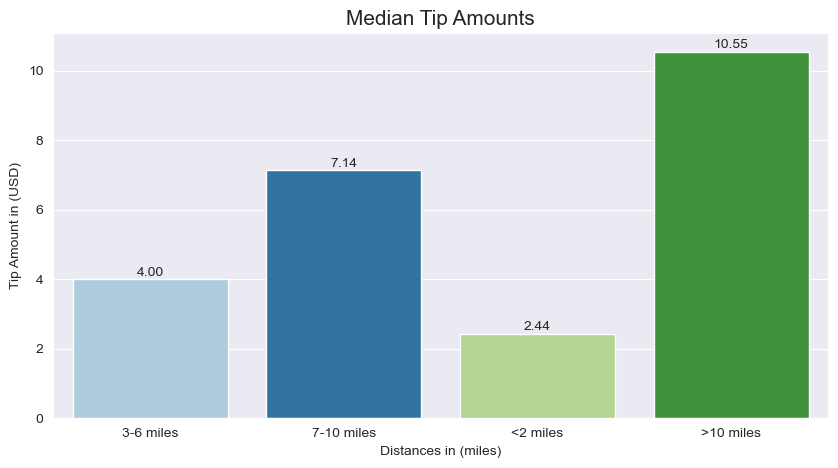

In [99]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=median_tip_trip_distance,x='distance_bins',y='median_tip',ci=0,palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.1
    label = "{:.2f}".format(median_tip_trip_distance['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.xlabel('Distances in (miles)')
plt.ylabel('Tip Amount in (USD)')
plt.title('Median Tip Amounts',fontsize=15)
plt.show()

In [100]:
stat, pvalue= kruskal(
    tip_trip_distance[tip_trip_distance['distance_bins'] == '<2 miles']['tip_amount'].sample(100,random_state=0),
    tip_trip_distance[tip_trip_distance['distance_bins'] == '3-6 miles']['tip_amount'].sample(100,random_state=0),
    tip_trip_distance[tip_trip_distance['distance_bins'] == '7-10 miles']['tip_amount'].sample(100,random_state=0),
    tip_trip_distance[tip_trip_distance['distance_bins'] == '>10 miles']['tip_amount'].sample(100,random_state=0)
)

print('p-Value',pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 1.6599197209973676e-36
Tolak H0


    Trip Duration

In [101]:
tip_trip_duration = data_frame[data_frame['tip_amount']>0][['tip_amount', 'duration_bins']]
median_tip_trip_duration = tip_trip_duration.groupby('duration_bins').agg(count=('tip_amount', 'count'), avg_tip=('tip_amount', 'mean'), median_tip=('tip_amount', 'median')).round(2).reset_index()
median_tip_trip_duration

,duration_bins,count,avg_tip,median_tip
0,11-20 minutes,16205,3.71,3.56
1,21-30 minutes,4876,5.56,5.37
2,<10 minutes,13931,2.40,2.34
3,>30 minutes,2003,8.24,7.80


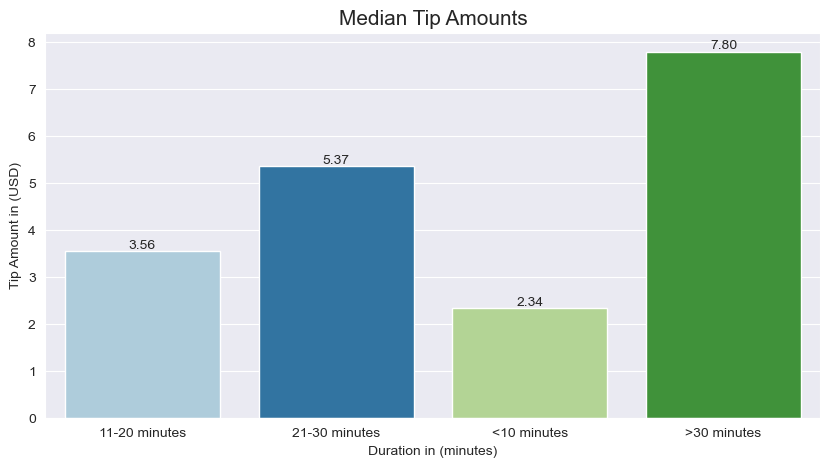

In [103]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=median_tip_trip_duration,x='duration_bins',y='median_tip',ci=0,palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.05
    label = "{:.2f}".format(median_tip_trip_duration['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.xlabel('Duration in (minutes)')
plt.ylabel('Tip Amount in (USD)')
plt.title('Median Tip Amounts',fontsize=15)
plt.show()

In [104]:
stat, pvalue= kruskal(
    tip_trip_duration[tip_trip_duration['duration_bins'] == '<10 minutes']['tip_amount'].sample(100,random_state=0),
    tip_trip_duration[tip_trip_duration['duration_bins'] == '11-20 minutes']['tip_amount'].sample(100,random_state=0),
    tip_trip_duration[tip_trip_duration['duration_bins'] == '21-30 minutes']['tip_amount'].sample(100,random_state=0),
    tip_trip_duration[tip_trip_duration['duration_bins'] == '>30 minutes']['tip_amount'].sample(100,random_state=0)
)

print('p-Value',pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 2.835715464363157e-37
Tolak H0


    Driving Speed

In [105]:
tip_driving_speed = data_frame[data_frame['tip_amount']>0][['tip_amount','speed_bins']]
median_tip_driving_speed = tip_driving_speed.groupby('speed_bins').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
median_tip_driving_speed

,speed_bins,count,avg_tip,median_tip
0,11-20 mph,19412,3.68,3.06
1,21-30 mph,2630,5.98,5.24
2,<10 mph,14537,3.19,2.94
3,>30 mph,436,8.51,8.07


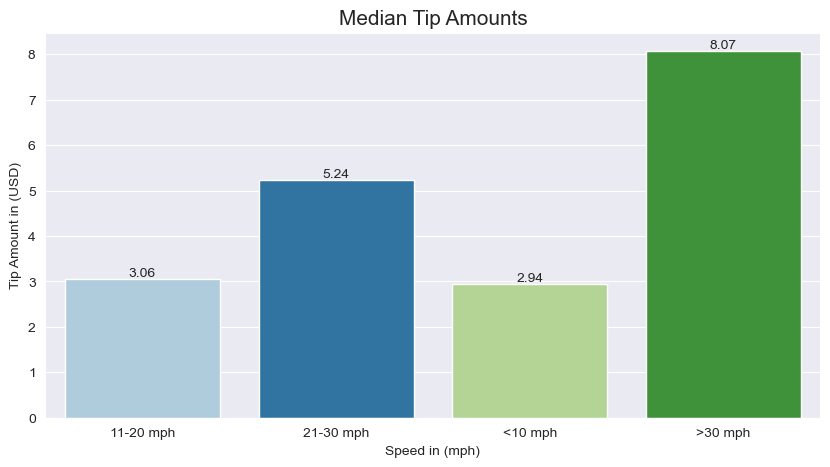

In [106]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=median_tip_driving_speed,x='speed_bins',y='median_tip',ci=0,palette=sns.color_palette('Paired'))
for idx, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.05
    label = "{:.2f}".format(median_tip_driving_speed['median_tip'].iloc[idx]) 
    plt.text(x_value,y_value,label,ha='center')

plt.xlabel('Speed in (mph)')
plt.ylabel('Tip Amount in (USD)')
plt.title('Median Tip Amounts',fontsize=15)
plt.show()

In [107]:
stat, pvalue= kruskal(
    tip_driving_speed[tip_driving_speed['speed_bins'] == '<10 mph']['tip_amount'].sample(100,random_state=0),
    tip_driving_speed[tip_driving_speed['speed_bins'] == '11-20 mph']['tip_amount'].sample(100,random_state=0),
    tip_driving_speed[tip_driving_speed['speed_bins'] == '21-30 mph']['tip_amount'].sample(100,random_state=0),
    tip_driving_speed[tip_driving_speed['speed_bins'] == '>30 mph']['tip_amount'].sample(100,random_state=0)
)

print('p-Value',pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 7.378046343522477e-22
Tolak H0


    Fare Amount

In [108]:
tip_fare_amount = data_frame[data_frame['tip_amount']>0][['tip_amount','fare_amount_bins']]
median_tip_fare_amount = tip_fare_amount.groupby('fare_amount_bins').agg(count=('tip_amount','count'), avg_tip=('tip_amount','mean'), median_tip=('tip_amount','median')).round(2).reset_index()
median_tip_fare_amount

,fare_amount_bins,count,avg_tip,median_tip
0,21-40$,7890,5.44,5.46
1,41-60$,1091,8.71,9.43
2,<20$,27696,2.89,2.80
3,>60$,338,14.01,15.60


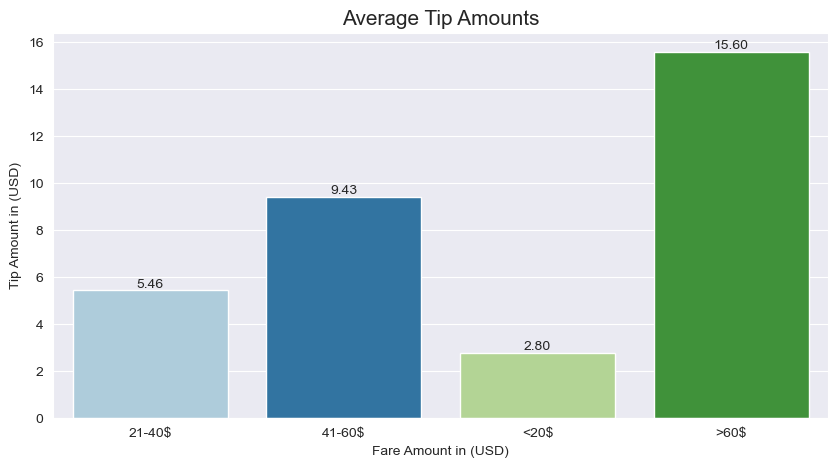

In [109]:
plt.figure(figsize=(10,5))

bars = sns.barplot(data=median_tip_fare_amount,x='fare_amount_bins',y='median_tip',ci=0,palette=sns.color_palette('Paired'))
for index, bar in enumerate(bars.patches):
    x_value = bar.get_x()+bar.get_width()/2
    y_value = bar.get_height()+0.1
    label = "{:.2f}".format(median_tip_fare_amount['median_tip'].iloc[index]) 
    plt.text(x_value,y_value,label,ha='center')

plt.xlabel('Fare Amount in (USD)')
plt.ylabel('Tip Amount in (USD)')
plt.title('Average Tip Amounts',fontsize=15)
plt.show()

In [110]:
stat, pvalue= kruskal(
    tip_fare_amount[tip_fare_amount['fare_amount_bins'] == '<20$']['tip_amount'].sample(100,random_state=0),
    tip_fare_amount[tip_fare_amount['fare_amount_bins'] == '21-40$']['tip_amount'].sample(100,random_state=0),
    tip_fare_amount[tip_fare_amount['fare_amount_bins'] == '41-60$']['tip_amount'].sample(100,random_state=0),
    tip_fare_amount[tip_fare_amount['fare_amount_bins'] == '>60$']['tip_amount'].sample(100,random_state=0)
)

print('p-Value',pvalue)

if pvalue > 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

p-Value 9.636778931277564e-37
Tolak H0
